# Демонстрация. Линеаризация

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, norm, mode, t
import seaborn as sns
import matplotlib.pyplot as plt
import time
from typing import Dict, Union, Tuple

## Подготовка данных для демонстрации

In [4]:
df = pd.DataFrame({
    'user_id':     [1,1,1,1,2,2,2,3,3,4,5,5,5,6,6,6,7,7,8,8,8,9,10,11,12],
    'clicks':      [2,4,1,9, 10,6,14,8,11, 9,4,5,9, 7,18,16, 5,3, 7,5,10, 2, 4, 1, 8],
    'show':        [10,26,17,25,19,17,11,11,21,16,26,19,14,30,41,51,21,20,17,10,8,5,8,5,15],
    'group':       ['A','A','A','A','B','B','B','B','B','A','A','A','A','B','B','B','A','A','B','B','B','A','B','A','B'],
})

df.head(15)

,user_id,clicks,show,group
0,1,2,10,A
1,1,4,26,A
2,1,1,17,A
3,1,9,25,A
4,2,10,19,B
5,2,6,17,B
6,2,14,11,B
7,3,8,11,B
8,3,11,21,B
9,4,9,16,A


In [5]:
df_grouped = df.groupby(['user_id', 'group']).agg({
    'clicks': 'sum',
    'show': 'sum',
}).reset_index()

df_grouped.head(10)

,user_id,group,clicks,show
0,1,A,16,78
1,2,B,30,47
2,3,B,19,32
3,4,A,9,16
4,5,A,18,59
5,6,B,41,122
6,7,A,8,41
7,8,B,22,35
8,9,A,2,5
9,10,B,4,8


## Подход

Идея — приведение ratio-метрики к обычной дискретной.\
L — линеаризованная метрика.

In [7]:
A = df_grouped.loc[df_grouped.group == 'A']
B = df_grouped.loc[df_grouped.group == 'B']

K = A.clicks.sum() / A.show.sum()
df_grouped['CTR'] = round(df_grouped['clicks'] / df_grouped['show'], 3)
df_grouped['L'] = df_grouped['clicks'] - K * df_grouped['show']

df_grouped.sort_values(['group', 'CTR']).head(10)

,user_id,group,clicks,show,CTR,L
6,7,A,8,41,0.195,-2.852941
10,11,A,1,5,0.200,-0.323529
0,1,A,16,78,0.205,-4.647059
4,5,A,18,59,0.305,2.382353
8,9,A,2,5,0.400,0.676471
3,4,A,9,16,0.562,4.764706
5,6,B,41,122,0.336,8.705882
9,10,B,4,8,0.500,1.882353
11,12,B,8,15,0.533,4.029412
2,3,B,19,32,0.594,10.529412


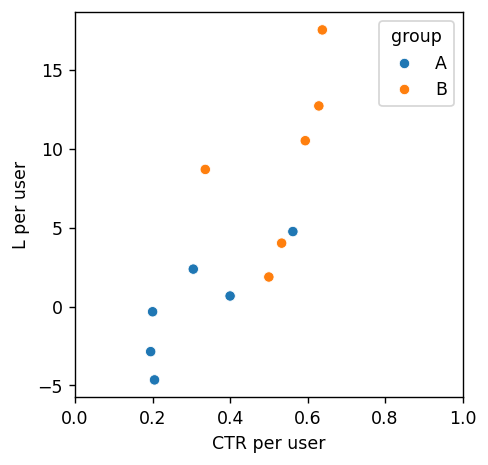

In [8]:
plt.figure(figsize=(4,4), dpi=125)
sns.scatterplot(data=df_grouped, x='CTR', y='L', hue='group')
plt.xlabel('CTR per user')
plt.xlim([0, 1])
plt.ylabel('L per user')
plt.show()